<a href="https://colab.research.google.com/github/IIbitoye/FDSfE_IIbitoye/blob/main/Classwork/ITE_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
bank = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/bank_term_deposit.csv")

In [ ]:
bank.head()

In [ ]:
bank.tail()

In [ ]:
bank.info()

In [ ]:
bank["y"]

In [9]:
bank["y"].unique()

array(['no', 'yes'], dtype=object)

In [10]:
bank["y"]=="yes"

0       False
1       False
2       False
3       False
4       False
        ...  
1037     True
1038     True
1039     True
1040     True
1041     True
Name: y, Length: 1042, dtype: bool

In [11]:
(bank["y"]=="yes").astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1037    1
1038    1
1039    1
1040    1
1041    1
Name: y, Length: 1042, dtype: int64

In [12]:
bank["target"]=(bank["y"]=="yes").astype(int)

In [ ]:
bank

In [ ]:
bank.hist(figsize=(10,10));

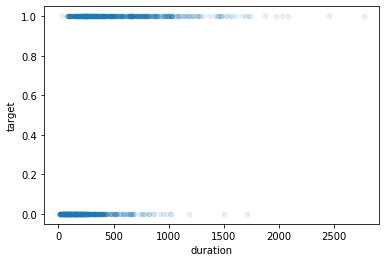

In [20]:
bank.plot("duration","target",kind="scatter", alpha=0.1);

In [21]:
features=bank["duration"]
target=bank["target"]

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
#initialize
logreg= LogisticRegression()

In [31]:
features=features.values.reshape(-1,1)

In [ ]:
logreg.fit(features, target)

In [33]:
logreg.intercept_

array([-1.54905868])

In [34]:
logreg.coef_

array([[0.00443281]])

In [35]:
import pylab as plt
import numpy as np

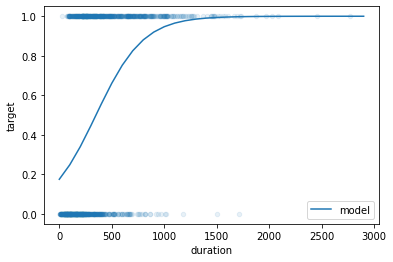

In [38]:
ax=bank.plot("duration","target",kind="scatter", alpha=0.1)
x = np.arange(0,3000,100)
z = logreg.coef_[0]*x +logreg.intercept_
f = 1/(1 + np.exp(-z))
ax.plot(x, f, label="model")
ax.legend();

In [40]:
prediction=logreg.predict(features)

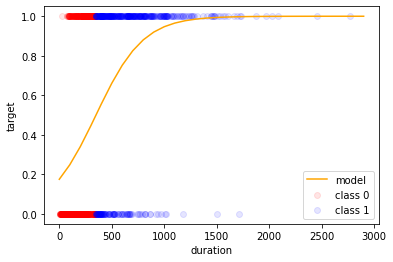

In [44]:
plt.scatter(features[prediction==0], target[prediction==0], alpha=0.1, color="red", label="class 0")
plt.scatter(features[prediction==1], target[prediction==1], alpha=0.1, color="blue", label="class 1")
plt.plot(x,f,color="orange",label="model")
plt.xlabel("duration")
plt.ylabel("target")
plt.legend();

In [45]:
from sklearn.metrics import r2_score

r2_score(target, prediction)

-0.15930902111324374

In [ ]:
prediction==target

In [ ]:
(prediction==target).sum()

In [52]:
accuracy=(prediction==target).sum()/len(target)

print("Model accuracy= {0:.1f}%".format(accuracy*100))

Model accuracy= 71.0%
